Fine tuning

### Prepare the data to be used for fine tuning

In [30]:
import numpy as np
import pandas as pd
data = np.load('../training/ftdata/data_warped.npy')
para = pd.read_csv('../training/ftdata/para.csv')

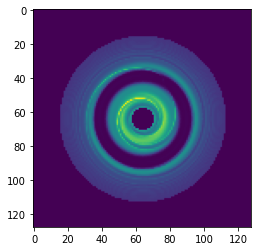

In [31]:
import matplotlib.pyplot as plt

plt.imshow(data[0])

In [32]:
para

,Unnamed: 0,InvStokes1,Alpha,AspectRatio,FlaringIndex,PlanetMass,SigmaSlope,nx,rout,ny
0,0,154.881662,0.001479,0.04435,0.09975,0.000327,0.6995,708.0,3,228.0
1,1,32.359366,0.000234,0.03525,0.25025,0.002786,1.0005,891.0,3,287.0
2,2,37.153523,0.002818,0.08635,0.04375,0.005188,0.5875,600.0,5,242.0
3,3,107.151931,0.001175,0.06045,0.01575,0.000031,0.5315,600.0,3,193.0
4,4,588.843655,0.006166,0.08565,0.30275,0.000610,1.1055,600.0,3,193.0
...,...,...,...,...,...,...,...,...,...,...
95,95,245.470892,0.002239,0.07025,0.27125,0.000653,1.0425,600.0,3,193.0
96,96,102.329299,0.000389,0.05205,0.29925,0.000861,1.0985,604.0,3,195.0
97,97,467.735141,0.000295,0.06115,0.08575,0.000027,0.6715,600.0,3,193.0
98,98,389.045145,0.000141,0.06325,0.24675,0.000014,0.9935,600.0,3,193.0


In [33]:
#we need 4 np arrays with the following shapes

#train_x -> array containing the images to be used for training the fine tuning.
#train_x.shape = (N_images, 128,128,1)
train_x = data[0:80]
print(f'shape of train_x: {train_x.shape}')

#train_y -> array containing the targets of the training images
#train_y.shape = (N_images)
train_y = np.array(para.loc[0:79, 'PlanetMass']).reshape(-1)
print(f'shape of train_y: {train_y.shape}')


#test_x -> array containing the images for test (I suggest some of the new ones, they will be mixed with some of the old dataset)
#test_x.shape = (N_images, 128,128,1)
test_x = data[80:]
print(f'shape of test_x: {test_x.shape}')

#test_y -> targets for the test images
#test_y.shape = (N_images)
test_y = np.array(para.loc[80:, 'PlanetMass']).reshape(-1)
print(f'shape of test_y: {test_y.shape}')

shape of train_x: (80, 128, 128)
shape of train_y: (80,)
shape of test_x: (20, 128, 128)
shape of test_y: (20,)


In [35]:
from DBNets import DBNets
dbnets = DBNets.DBNets(ensemble='finalRI')

Initializing DBNets


Loading the CNN ensemble:  20%|██        | 10/50 [00:10<00:46,  1.15s/it]

In [28]:
dbnets.finetune?

Signature: dbnets.finetune(newdatay, newdatax_test, newdatay_test, ftname)
Docstring: <no docstring>
File:      ~/.local/lib/python3.10/site-packages/DBNets/DBNets.py
Type:      method


In [29]:
dbnets.finetune(train_x, train_y, test_x, test_y, 'test1')

TypeError: DBNets.finetune() takes 5 positional arguments but 6 were given

In [7]:
from DBNets import oofargo as oo

In [9]:
oo.warp_image_rolltodisk?

Signature:
oo.warp_image_rolltodisk(
    data,
    ntheta=384,
    nr=128,
    image_rmin=0.4,
    image_rmax=2.5,
    target_rmax=2.5,
    target_image_size=(200, 200),
    ylog=False,
)
Docstring: <no docstring>
File:      ~/.local/lib/python3.10/site-packages/DBNets/oofargo.py
Type:      function
